In [ ]:
###############################################################################################
# Versión 1
# Estudiar correlación entre atributos
# Se estudia de una sola estación a modo de ejemplo
#
# 
# entrada: Valencia_SeleccionDatos_ParaModelar_v1.csv
###############################################################################################

In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# cargar dataset con todas las estaciones seleccionadas para modelar, definir la fecha como índice del dataframe

# Ruta acceso directo
path = '/content/drive/MyDrive/datoscsv/'
#path='/content/drive/MyDrive/IABD_Proyecto/IABD_PRJ_Dev_PeakyBlinders/datoscsv/'

df = pd.read_csv(path + 'Valencia_SeleccionDatos_ParaModelar_v1.csv', sep=';', index_col='fecha', parse_dates=['fecha'])

# Volver a recuperar la fecha como campo
df.insert(0, 'FECHA', df.index.strftime('%Y-%m-%d'))

In [8]:
df

,FECHA,COD_ESTACION,NOM_ESTACION,SO2,NO,NO2,NOx,O3,PM10,PM2.5,Precip.,Temp.,Veloc.,Veloc.max.
fecha,,,,,,,,,,,,,,
1994-01-01,1994-01-01,46250030,PISTA DE SILLA,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-02,1994-01-02,46250030,PISTA DE SILLA,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-03,1994-01-03,46250030,PISTA DE SILLA,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-04,1994-01-04,46250030,PISTA DE SILLA,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-05,1994-01-05,46250030,PISTA DE SILLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,2022-03-27,46250048,MOLÍ DEL SOL,5.0,1.0,13.0,14.0,86.0,22.0,16.0,0.0,14.35,15.0,30.0
2022-03-28,2022-03-28,46250048,MOLÍ DEL SOL,7.0,4.0,23.0,28.0,65.0,24.0,19.0,0.0,12.85,9.0,24.0
2022-03-29,2022-03-29,46250048,MOLÍ DEL SOL,7.0,7.0,26.0,37.0,58.0,27.0,20.0,0.0,13.50,12.0,27.0


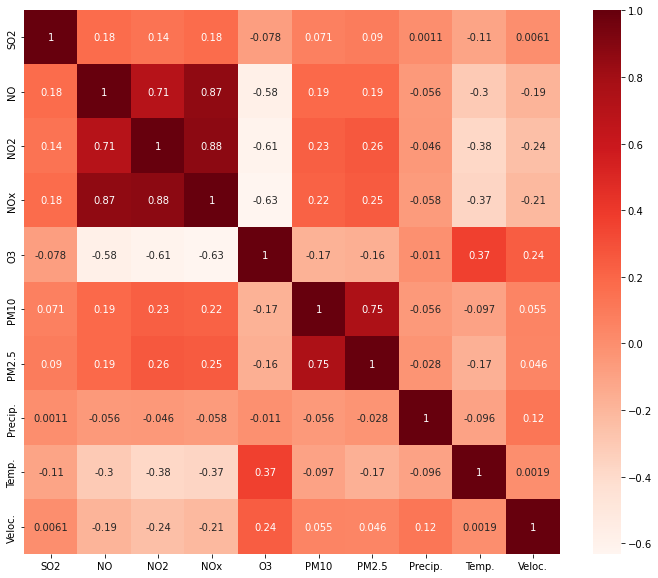

In [12]:
# Para estudiar la correlación seleccionamos la estación con mejores datos (AV. DE FRANCIA)
df2 = df[df['COD_ESTACION']==46250047]

# eliminamos algunos campos antes de calcular la correlación
df2 = df2.drop(['COD_ESTACION', 'Veloc.max.'], axis=1)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
correlacion = df2.corr() #Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(correlacion, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlación con la variable target
cor_target = abs(correlacion["PM2.5"]).sort_values(ascending=False)
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

PM2.5    1.00000
PM10     0.75147
Name: PM2.5, dtype: float64


In [14]:
#Correlación con la variable target
cor_target = abs(correlacion["PM10"]).sort_values(ascending=False)
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


PM10     1.00000
PM2.5    0.75147
Name: PM10, dtype: float64


In [15]:
#Correlación con la variable target
cor_target = abs(correlacion["O3"]).sort_values(ascending=False)
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


O3     1.000000
NOx    0.630982
NO2    0.609136
NO     0.576886
Name: O3, dtype: float64


In [16]:
#Correlación con la variable target
cor_target = abs(correlacion["NO"]).sort_values(ascending=False)
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


NO     1.000000
NOx    0.865324
NO2    0.705445
O3     0.576886
Name: NO, dtype: float64


In [18]:
#Correlación con la variable target
cor_target = abs(correlacion["Precip."]).sort_values(ascending=False)
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


Precip.    1.0
Name: Precip., dtype: float64


In [19]:
#Correlación con la variable target
cor_target = abs(correlacion["Temp."]).sort_values(ascending=False)
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


Temp.    1.0
Name: Temp., dtype: float64


In [20]:
#Correlación con la variable target
cor_target = abs(correlacion["Veloc."])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)


Veloc.    1.0
Name: Veloc., dtype: float64


In [ ]:
# Se concluye que no hay correlación entre los distintos contaminantes y las particulas 
# En contra de lo que a priori se podría haber afirmado, el resultado más sorprendente es que no existe correlación entre
# las variables meteorológicas y las particulas o contaminantes.